In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Загрузка датасета Cassava
dataset, info = tfds.load('cassava', split='train', shuffle_files=True, with_info=True)

# Предобработка данных
def preprocess_data(sample):
    image = tf.image.resize(sample['image'], (224, 224)) / 255.0
    label = sample['label']
    return image, label

# Применение предобработки к каждому элементу датасета
dataset = dataset.map(preprocess_data)

# Разделение на обучающую и тестовую выборки
train_dataset = dataset.take(18000)
test_dataset = dataset.skip(18000)

# Перемешивание и разбиение на батчи
train_dataset = train_dataset.shuffle(1000).batch(64)
test_dataset = test_dataset.batch(64)

In [21]:
# Определение модели MLP
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Обучение модели
history = model.fit(train_dataset, epochs=15, validation_data=test_dataset)

Epoch 1/15
89/89 [==============================] - 56s 619ms/step - loss: 21.3107 - accuracy: 0.3253
Epoch 2/15
89/89 [==============================] - 55s 610ms/step - loss: 3.3526 - accuracy: 0.3833
Epoch 3/15
89/89 [==============================] - 55s 609ms/step - loss: 1.4458 - accuracy: 0.4553
Epoch 4/15
89/89 [==============================] - 55s 611ms/step - loss: 1.2740 - accuracy: 0.5113
Epoch 5/15
89/89 [==============================] - 54s 607ms/step - loss: 1.2949 - accuracy: 0.5067
Epoch 6/15
89/89 [==============================] - 55s 611ms/step - loss: 1.1774 - accuracy: 0.5355
Epoch 7/15
89/89 [==============================] - 54s 607ms/step - loss: 1.2014 - accuracy: 0.5288
Epoch 8/15
89/89 [==============================] - 55s 608ms/step - loss: 1.2001 - accuracy: 0.5398
Epoch 9/15
89/89 [==============================] - 54s 604ms/step - loss: 1.1569 - accuracy: 0.5622
Epoch 10/15
89/89 [==============================] - 54s 603ms/step - loss: 1.2315 - accur

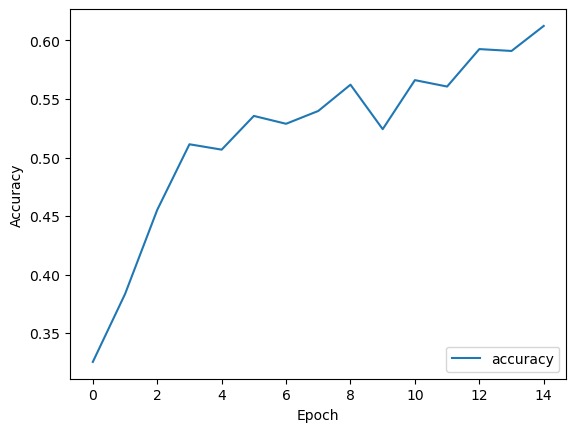

In [23]:
# Визуализация результатов
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()